<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_5_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 5**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: MACHINE LEARNING
*   CARRERA: DATA SCIENCE

---
**CONTEXTO**

Como Cientista de Datos te han contratado en una importante empresa de propiedades para analizar las diferentes características de algunas casas que se han vendido en el último tiempo, y que se encuentran en el dataset house_data.xlsx. Esta base de datos contiene diversas características de estas propiedades y su precio.

Responde las siguientes preguntas:

---
**1. Analizar la calidad de datos, para lo que debes cargarlos y realizar un proceso exhaustivo de limpieza para eliminar valores faltantes, duplicados y atípicos que puedan afectar la calidad del modelo, si los hay.**

In [87]:
# Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [88]:
# Cargar los datos
data = pd.read_excel('house_data.xlsx')

In [89]:
# Visualizar las primeras filas de los datos
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [90]:
# Obtener información sobre los tipos de datos y la cantidad de valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Casi todas las variables son numéricas, a excepción de la columna "date", que además requiere algunas transformaciones para poder ser convertida en formato fecha. Además no se observan valores nulos.

---



In [91]:
# Estadísticas descriptivas de las características numéricas
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [92]:
# Identificación de registros duplicados
duplicates = data.duplicated().sum()
duplicates

0

Vemos que tampoco existen registros duplicados en el dataset.

---
**2. Realizar un análisis descriptivo de las variables para entender la distribución de los datos y detectar posibles relaciones entre las características y los precios. En esto debes incluir un análisis de correlaciones entre las variables principalmente con el precio de las casas**

Vamos a comenzar el análisis revisando la distribución de la variable objetivo así como también algunos estadísticos fundamentales para las decisiones posteriores.

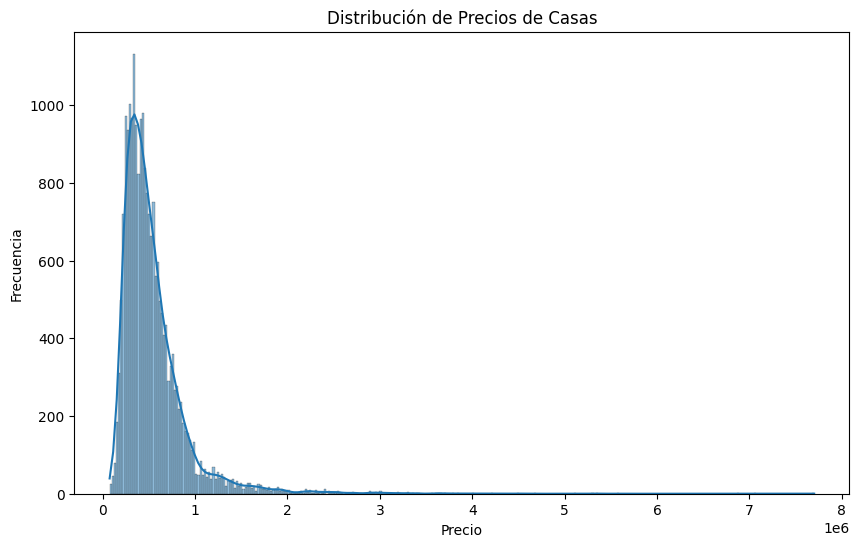

Media: 540088.1417665294
Mediana: 450000.0
Moda: 350000
Asimetría (Skewness): 4.023789858140135
Curtosis: 34.577262255687536


In [93]:
# Visualizar la distribución de 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribución de Precios de Casas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Calcular estadísticas descriptivas
mean_price = data['price'].mean()
median_price = data['price'].median()
mode_price = data['price'].mode()[0]
skewness_price = skew(data['price'])
kurtosis_price = kurtosis(data['price'])

print(f"Media: {mean_price}")
print(f"Mediana: {median_price}")
print(f"Moda: {mode_price}")
print(f"Asimetría (Skewness): {skewness_price}")
print(f"Curtosis: {kurtosis_price}")

Podemos ver que la distribución del precio de las casas tiene una asimetría positiva por lo que se encuentra positivamente sesgada. Además tiene una curtosis muy superior a 3, es decir, es mucho más puntiaguda que una distribución normal, por lo que se puede inferir que esta variable tiene valores atípicos de que tendremos que considerar en un par de pasos más adelante.

Ahora vamos a analizar la distribución de todas las variables numéricas para determinar visualmente similitudes con la distribución del precio.

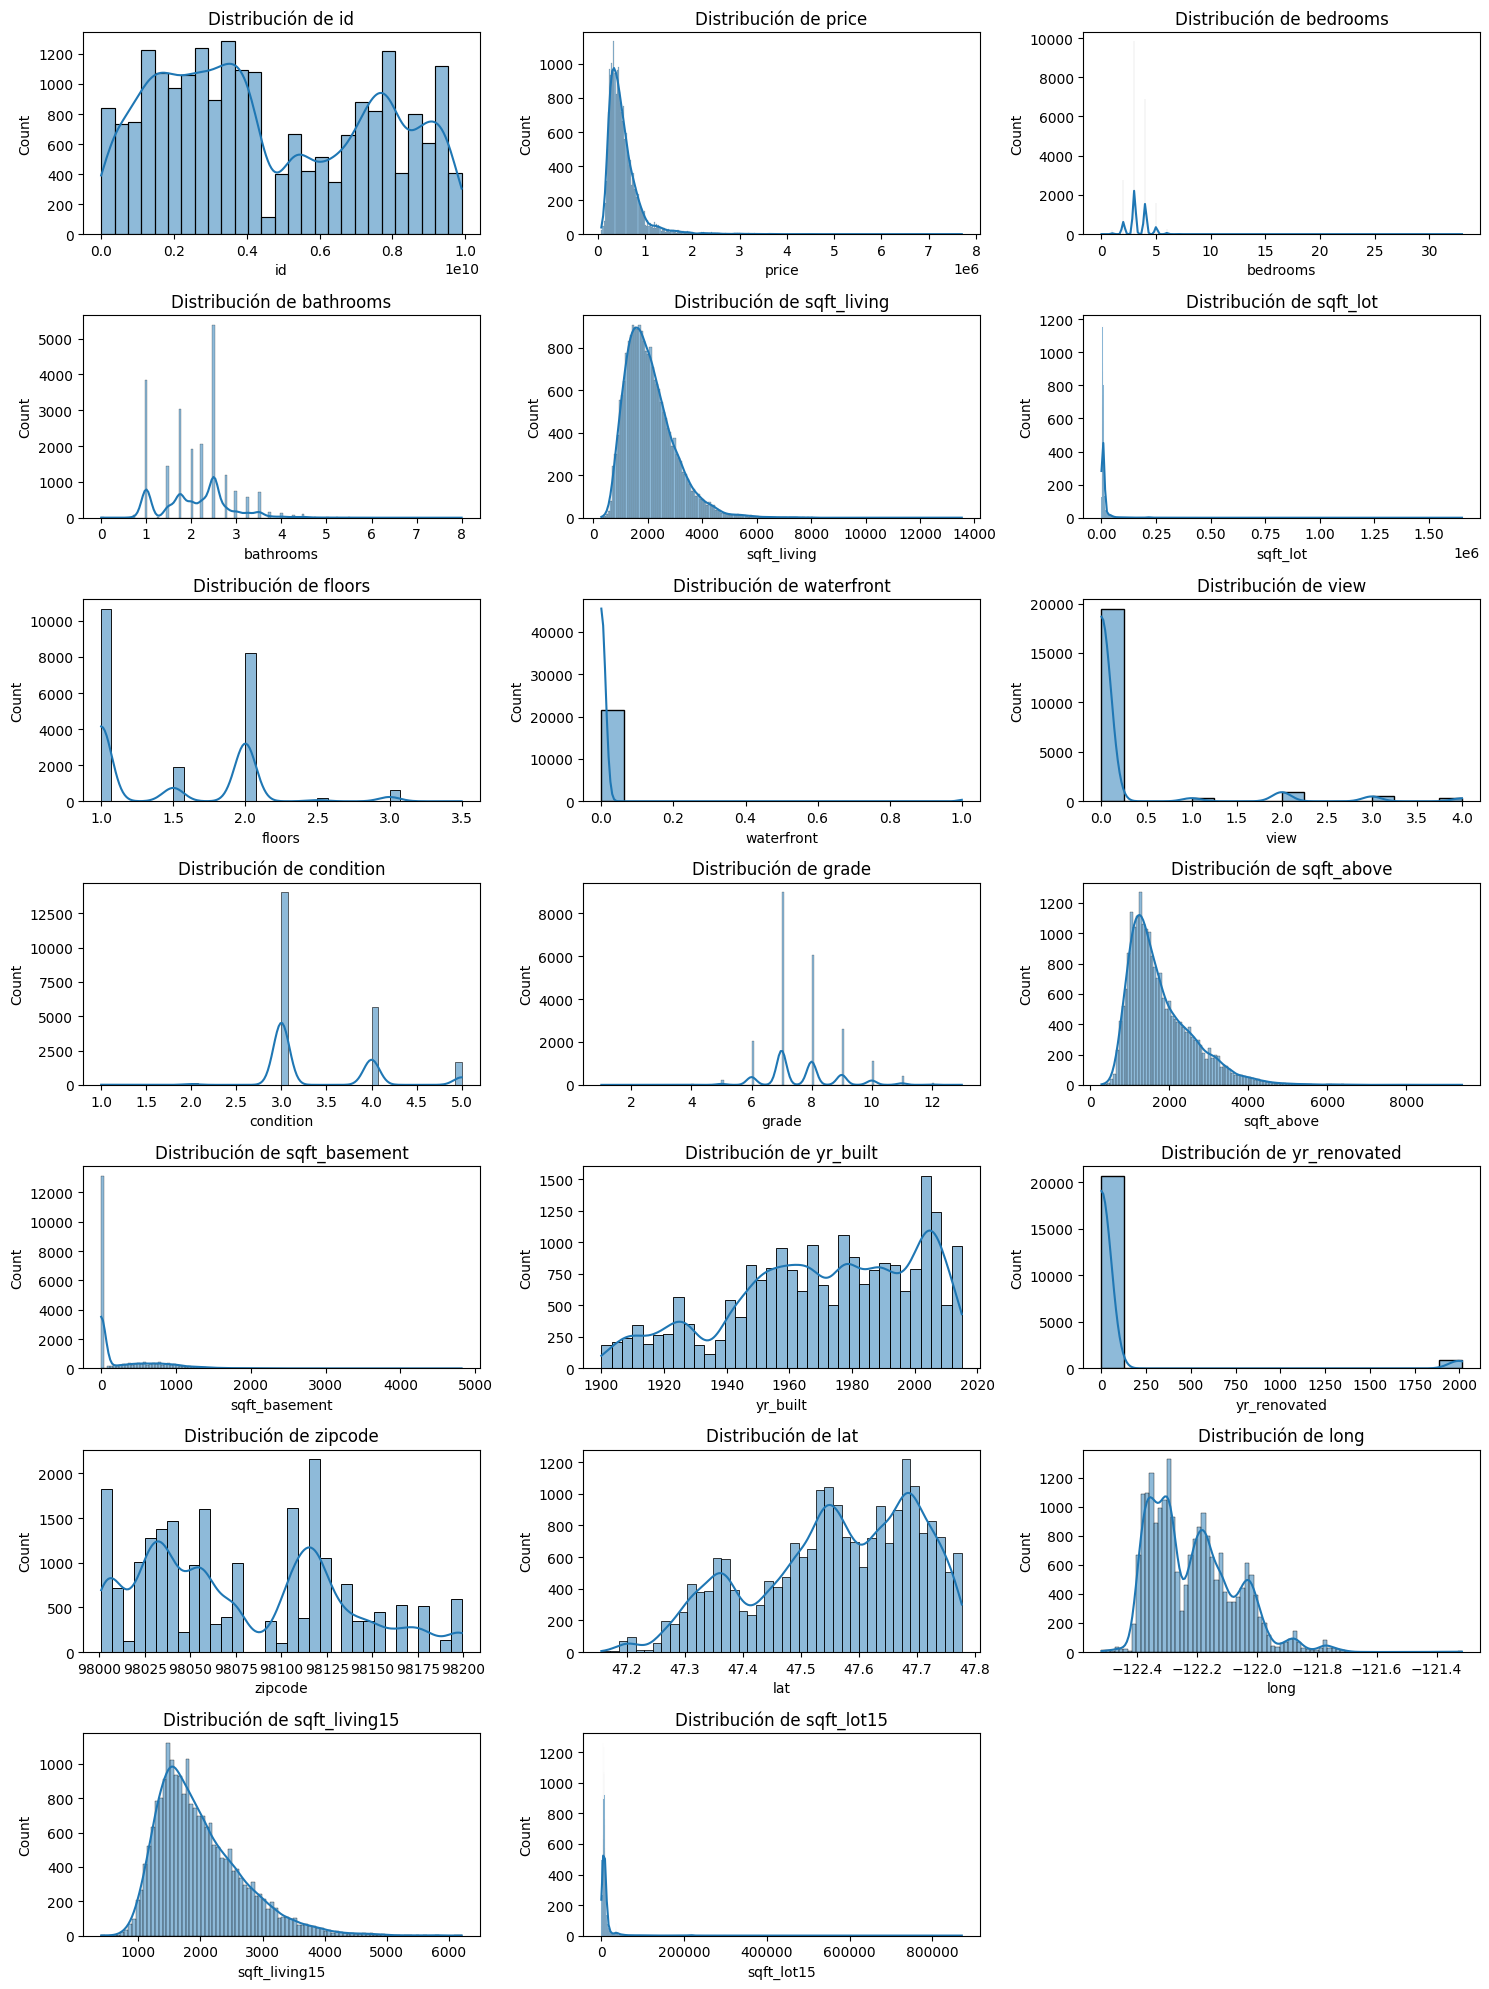

In [94]:
# Lista de columnas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Configurar la cuadrícula de los gráficos
plt.figure(figsize=(15, 20))

# Grafica la distribución para cada columna numérica
for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

De las gráficas de distribución se puede apreciar que al parecer las variables relativas al tamaño de las casas tiene una distribución bastante similar a la distribución del precio. De todas formas analizaremos la correlación de todas las variables numéricas con respecto a la variable objetivo para confirmar nuestra hipótesis.

<Figure size 1000x800 with 0 Axes>

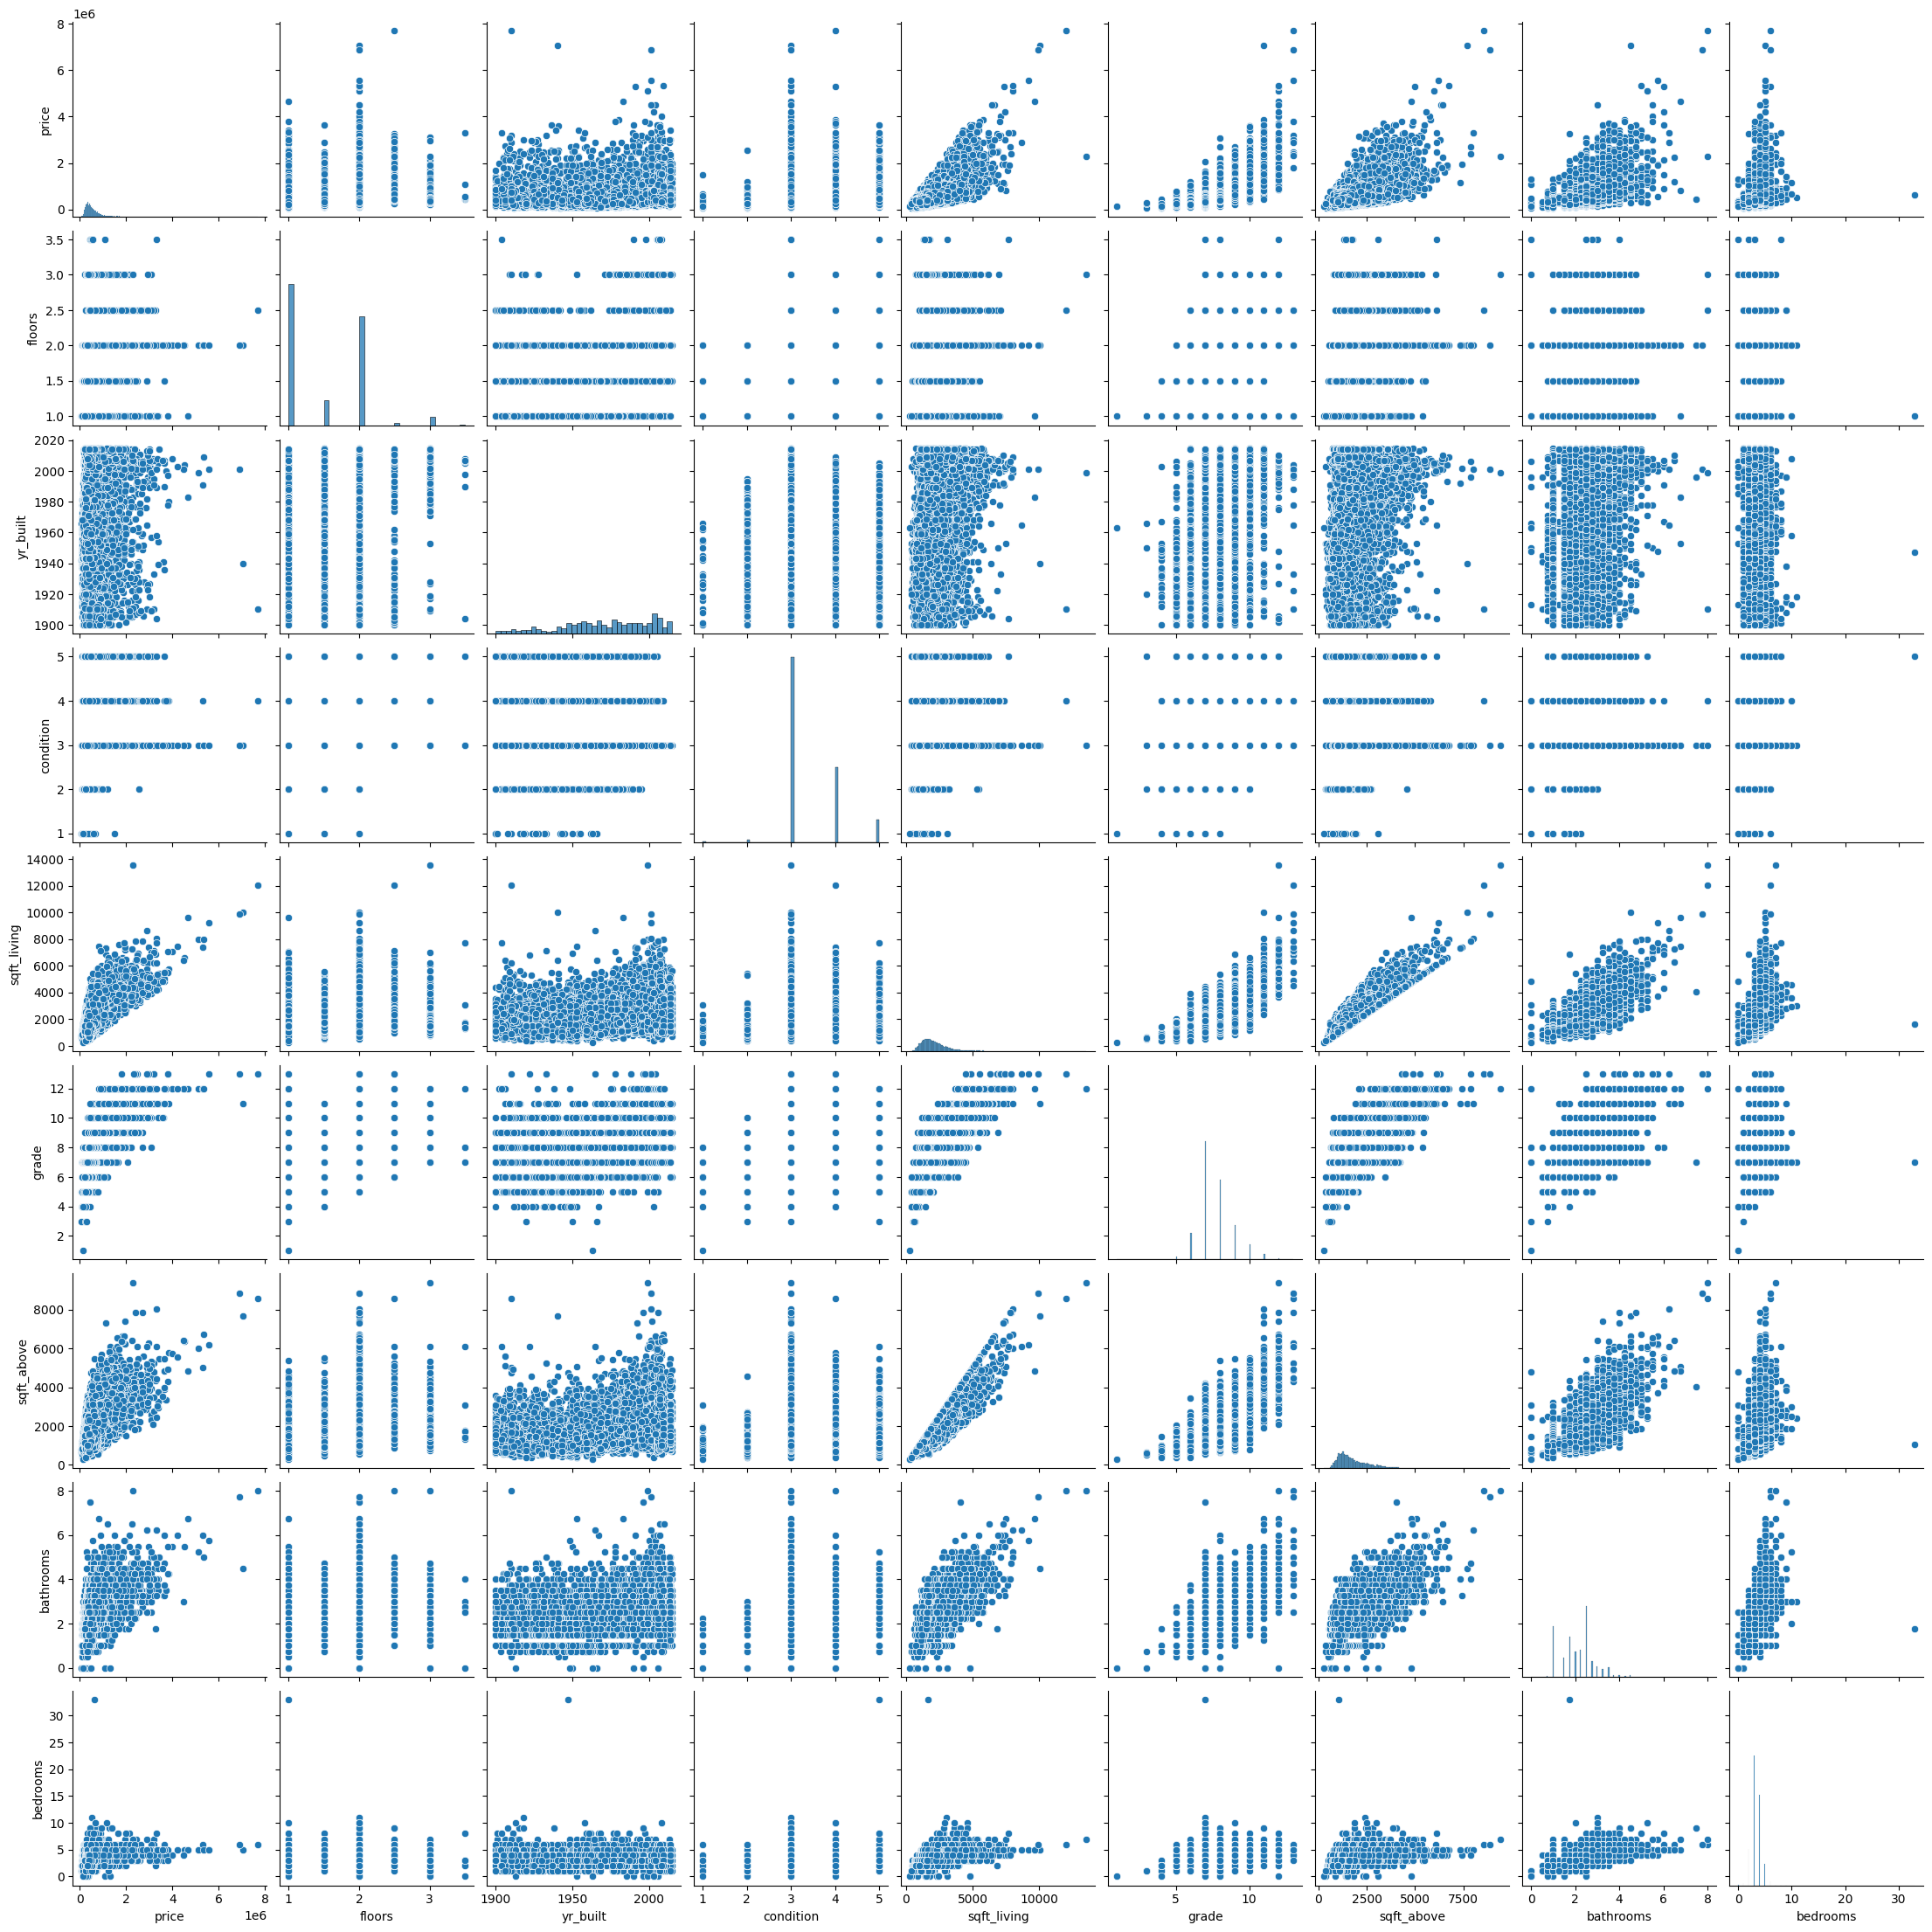

In [95]:
# Selecciona un subconjunto de variables para el pairplot debido a limitaciones de visualización
selected_features = ['price', 'floors', 'yr_built', 'condition', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms']

# Creando un DataFrame con las variables seleccionadas
df_selected = data[selected_features]

# Generando el pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df_selected)
plt.show()

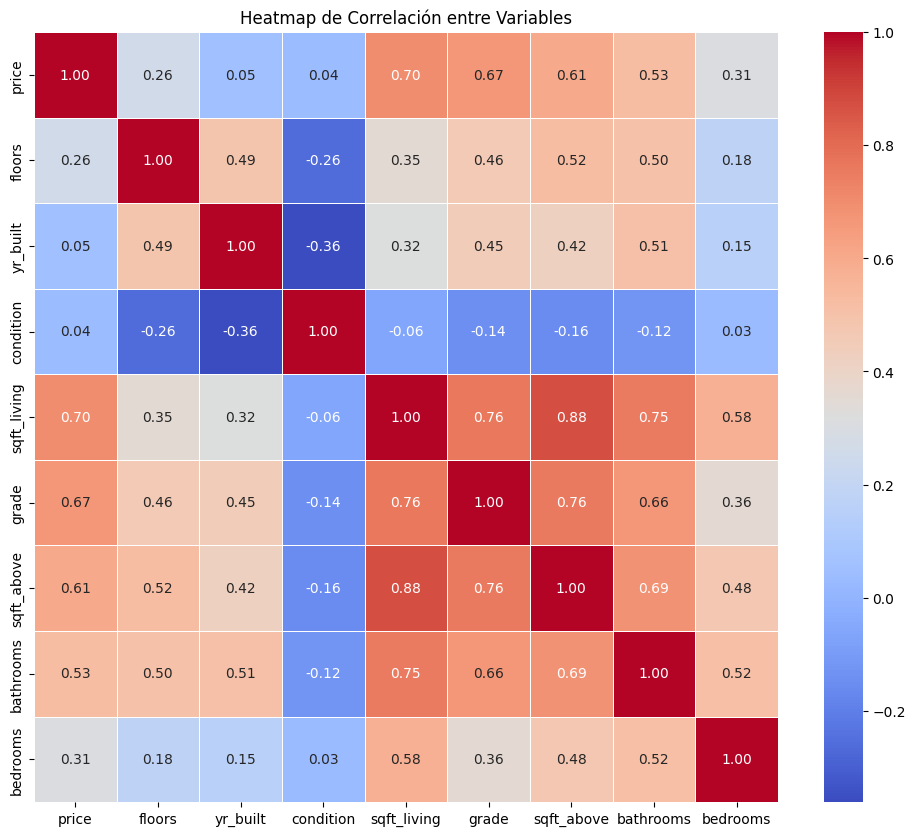

In [96]:
# Calcular la matriz de correlación de las variables numéricas
correlation_matrix = df_selected.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Generar el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlación entre Variables')
plt.show()

Bueno, con estas gráficas de correlación entre variables podemos confirmar la hipótesis anterior con respecto a la correlación positiva entre el precio de la vivienda y su tamaño, pero además podemos visualizar una correlación importante entre el precio y la variable "grade" que entenderemos como la calidad de la vivienda, es decir, a mayor calidad de la vivienda, mayor el precio. También encontramos algunas sorpresas como por ejemplo que el año de construcción de la vivienda no tienen ninguna injerencia en el precio, al igual que la cantidad de dormitorios, que instintivamente uno podría haber considerado inicialmente.

Ahora quiero analizar si la ubicación de la casa tiene algún grado de correlación con el precio de la misma. Para ello, utilizaré 2 gráficos de densidad.

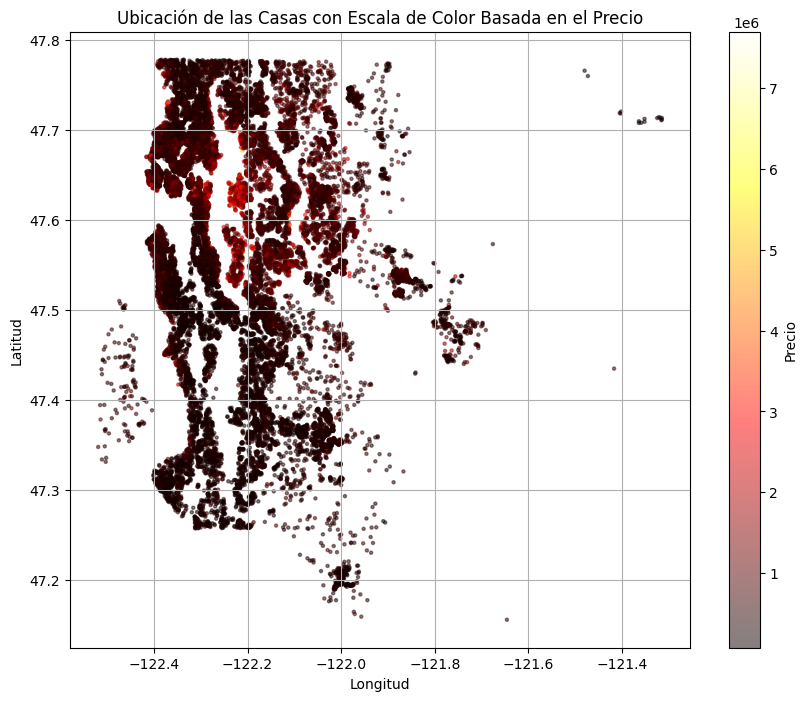

In [97]:
# Generar un scatter plot de ubicaciones de casas con color basado en el precio
plt.figure(figsize=(10, 8))
sc = plt.scatter(data['long'], data['lat'], c=data['price'], cmap='hot', alpha=0.5, s=5)
plt.colorbar(sc, label='Precio')
plt.title('Ubicación de las Casas con Escala de Color Basada en el Precio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

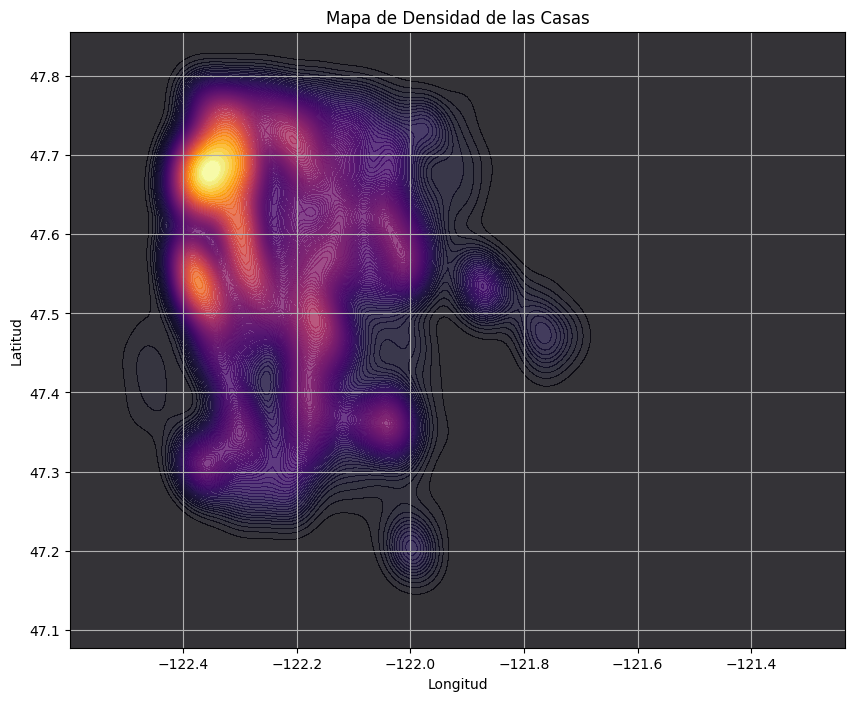

In [98]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear un mapa de densidad (kdeplot)
sns.kdeplot(
    x=data['long'],
    y=data['lat'],
    cmap="inferno",
    fill=True,
    thresh=0,
    levels=100,
    alpha=0.8
)

plt.title('Mapa de Densidad de las Casas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

En estas gráficas podemos visualizar un elemento interesante. Hay una celda de esta cuadrícula que no solo tiene mayor concentración de casas sino que además, estas tienen un valor mayor al resto. Ahora vamos a analizar con un boxplot si existen valores atípicos en las variables más importantes del dataset.

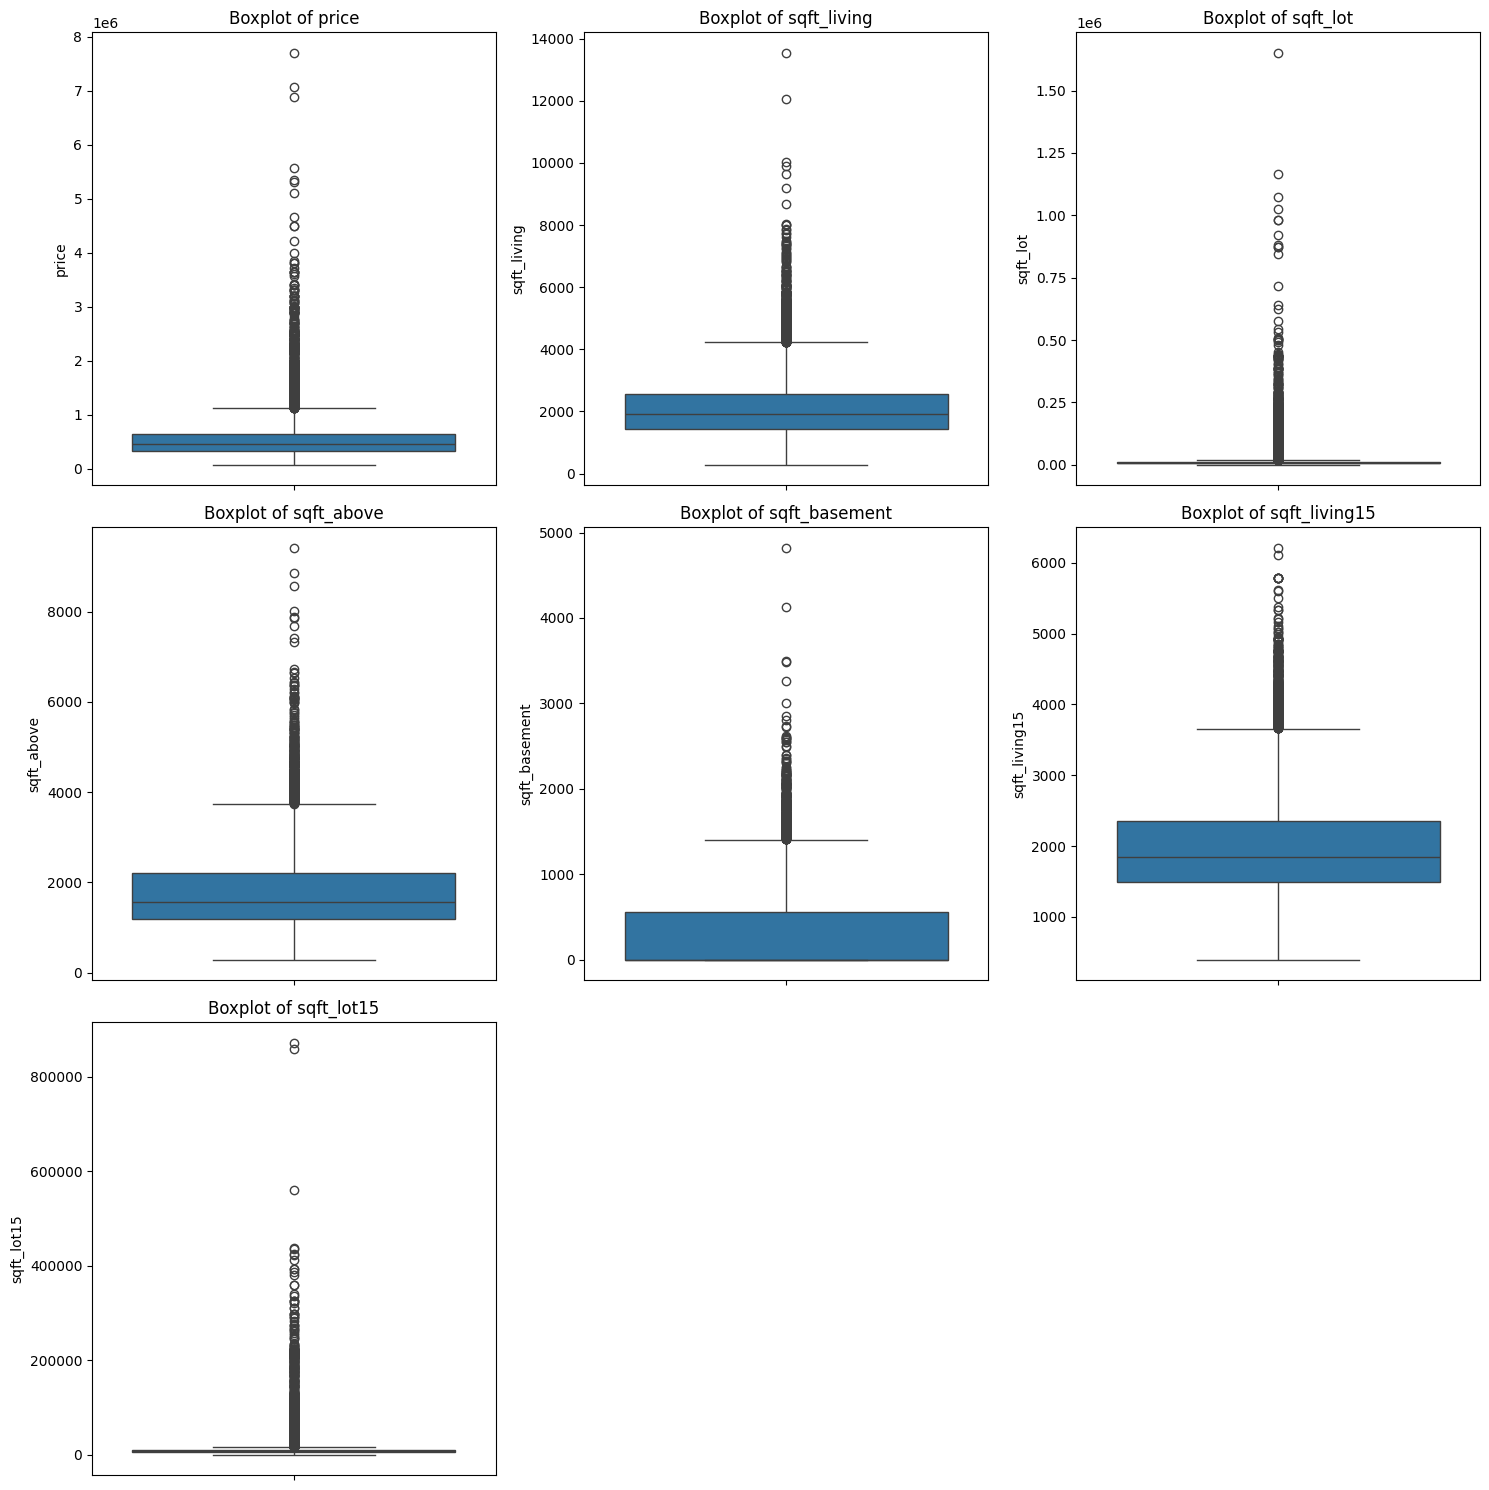

In [99]:
# Identifica variables continuas
continuous_vars = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Configura un área de gráficos para varios boxplots
plt.figure(figsize=(15, 15))

# Itera sobre cada variable continua para generar un boxplot
for i, var in enumerate(continuous_vars):
    plt.subplot(len(continuous_vars) // 3 + 1, 3, i + 1)
    sns.boxplot(data=data, y=var)
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

Este set de boxplot confirma que tenemos varios valores atípicos dentro de la variable objetivo y de otras que son importantes relacionadas al tamaño de las casas. De todas formas vamos a dimensionar el porcentaje de outliers de cada columna para decidir qué hacer con ellos.

In [100]:
# Calcular el IQR para cada columna numérica
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
outliers = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR)))

# Calcular el porcentaje de valores atípicos para cada columna
outliers_percentage = outliers.sum() / data.shape[0] * 100

# Mostrar el porcentaje de valores atípicos por columna
print("Porcentaje de valores atípicos por columna")
print(outliers_percentage)

Porcentaje de valores atípicos por columna
id                0.000000
price             5.302364
bedrooms          2.526257
bathrooms         2.641928
sqft_living       2.646555
sqft_lot         11.220099
floors            0.000000
waterfront        0.754176
view              9.827419
condition         0.138805
grade             8.841901
sqft_above        2.827002
sqft_basement     2.294915
yr_built          0.000000
yr_renovated      4.228936
zipcode           0.000000
lat               0.009254
long              1.184472
sqft_living15     2.517004
sqft_lot15       10.151298
dtype: float64


Vemos que en la mayoría de las variables los valores atípicos no exceden el 5% incluyendo la variable objetivo por lo que los filtraremos.

In [101]:
# Elimina valores atípicos utilizando la variable de valores atípicos identificados
clean_data = data[~outliers.any(axis=1)]

# Verifique la forma de los datos limpios para ver cuántas filas quedan
clean_data.shape

(14934, 21)

Ahora vamos a filtrar algunas columnas del dataset que considero que no aportan valor al modelo, por ejemplo, el id y las variables sin correlación con la variable objetivo.

In [102]:
# Definir columnas no relevantes y/o sin correlación con el precio
columns_to_drop = ['id', 'date', 'bedrooms', 'yr_built', 'condition', 'waterfront', 'floors', 'yr_renovated', 'zipcode', 'view']

# Filtrar el DataFrame eliminando las columnas no relevantes
filtered_data = clean_data.drop(columns=columns_to_drop)

In [103]:
filtered_data.describe()

,price,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,1.493400e+04,14934.000000,14934.000000,14934.000000,14934.00000,14934.000000,14934.000000,14934.000000,14934.000000,14934.000000,14934.000000
mean,4.385302e+05,1.972161,1814.148922,6988.296170,7.38034,1585.186219,228.962703,47.558889,-122.230153,1796.781237,6867.813781
std,1.802970e+05,0.646037,614.643640,3355.776555,0.80503,601.496110,353.242494,0.142090,0.123697,507.257599,2987.796833
min,8.200000e+04,0.750000,560.000000,520.000000,6.00000,480.000000,0.000000,47.189500,-122.472000,620.000000,651.000000
25%,3.000000e+05,1.500000,1350.000000,4690.000000,7.00000,1140.000000,0.000000,47.457600,-122.333000,1430.000000,4800.000000
50%,4.050000e+05,2.000000,1740.000000,7020.000000,7.00000,1430.000000,0.000000,47.569700,-122.264000,1710.000000,7171.500000
75%,5.475000e+05,2.500000,2210.000000,8925.000000,8.00000,1910.000000,450.000000,47.683500,-122.153000,2090.000000,8649.000000
max,1.127000e+06,3.500000,4200.000000,19141.000000,9.00000,3740.000000,1400.000000,47.777600,-121.821000,3640.000000,17550.000000


---
**3. Aplicar técnicas de transformación de datos, como normalización o estandarización, para asegurar que las variables estén en una escala comparable. Luego de ello, divide el conjunto de datos en conjuntos de entrenamiento y prueba de manera aleatoria o estratificada.**

In [109]:
# Seleccionando la variable objetivo y las variables independientes
features = filtered_data.drop(['price'], axis=1)
target = filtered_data['price']

# Estandarización de las variables
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Separa los datos en subconjuntos de entrenamiento y testeo (80-20)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((11947, 10), (2987, 10), (11947,), (2987,))

Los datos han sido transformados mediante estandarización y divididos en conjuntos de entrenamiento y prueba:

- Conjunto de entrenamiento: 11,947 muestras
- Conjunto de prueba: 2,987 muestras

---
**4. Implementar modelos de regresión lineal con regularización, como Ridge, Lasso o Elastic Net y ajuste los hiper parámetros mostrando como se mueve los hiperparametros y el ajuste. Además, debes construir modelos de árboles de regresión para capturar relaciones no lineales y complejas entre las variables predictoras y el precio de las casas.**

In [110]:
# Regresión Ridge con Grid Search para ajuste de hiperparámetros
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Regresión Lasso con Grid Search para ajuste de hiperparámetros
lasso = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Regresión ElasticNet con Grid Search para ajuste de hiperparámetros
elastic_net = ElasticNet()
elastic_net_params = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, cv=5, scoring='neg_mean_squared_error')
elastic_net_grid.fit(X_train, y_train)

# Árboles Regresores con Grid Search para ajuste de hiperparámetros
tree = DecisionTreeRegressor(random_state=42)
tree_params = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 10, 20]}
tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='neg_mean_squared_error')
tree_grid.fit(X_train, y_train)

# Recopilación de los mejores estimadores y sus correspondientes puntuaciones.
best_models = {
    'Ridge': ridge_grid.best_estimator_,
    'Lasso': lasso_grid.best_estimator_,
    'ElasticNet': elastic_net_grid.best_estimator_,
    'DecisionTree': tree_grid.best_estimator_
}

best_scores = {
    'Ridge': ridge_grid.best_score_,
    'Lasso': lasso_grid.best_score_,
    'ElasticNet': elastic_net_grid.best_score_,
    'DecisionTree': tree_grid.best_score_
}

best_models, best_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.235e+12, tolerance: 3.082e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.768e+12, tolerance: 3.118e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.980e+12, tolerance: 3.077e

({'Ridge': Ridge(alpha=10),
  'Lasso': Lasso(alpha=10),
  'ElasticNet': ElasticNet(alpha=0.01),
  'DecisionTree': DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)},
 {'Ridge': -13436418548.982327,
  'Lasso': -13436370286.028608,
  'ElasticNet': -13436353697.47312,
  'DecisionTree': -6635092772.560074})

In [112]:
# Asignación de los mejores modelos
ridge_best = ridge_grid.best_estimator_
lasso_best = lasso_grid.best_estimator_
elastic_net_best = elastic_net_grid.best_estimator_
tree_best = tree_grid.best_estimator_

# Predicciones
ridge_pred = ridge_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)
elastic_net_pred = elastic_net_best.predict(X_test)
tree_pred = tree_best.predict(X_test)

---
**5. Utilizar métricas de evaluación de regresión, como el Error Cuadrático Medio (MSE), el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R2), para medir el rendimiento del modelo y concluir sobre ellos.**

Lo primero que haremos será comparar las matrices de confusión de los 3 modelos para comparar posteriormente las métricas correspondientes.

In [114]:
# Métricas de evaluación de los modelos
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
elastic_net_mae = mean_absolute_error(y_test, elastic_net_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

tree_mse = mean_squared_error(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

# Recopila los resultados en un diccionario
evaluation_results = {
    'Ridge': {'MSE': ridge_mse, 'MAE': ridge_mae, 'R2': ridge_r2},
    'Lasso': {'MSE': lasso_mse, 'MAE': lasso_mae, 'R2': lasso_r2},
    'ElasticNet': {'MSE': elastic_net_mse, 'MAE': elastic_net_mae, 'R2': elastic_net_r2},
    'DecisionTree': {'MSE': tree_mse, 'MAE': tree_mae, 'R2': tree_r2}
}

evaluation_results

{'Ridge': {'MSE': 13592921812.089588,
  'MAE': 85962.92548245235,
  'R2': 0.5848829599766394},
 'Lasso': {'MSE': 13592611446.11787,
  'MAE': 85962.74777822402,
  'R2': 0.5848924383070002},
 'ElasticNet': {'MSE': 13594621917.962523,
  'MAE': 85958.51915645419,
  'R2': 0.5848310400930813},
 'DecisionTree': {'MSE': 6818648132.05463,
  'MAE': 56578.550689117415,
  'R2': 0.7917638997215561}}

Los resultados después de ajustar y evaluar los modelos son los siguientes:

1. Ridge Regression:
  - MSE: 13,592,921,812.09
  - MAE: 85,962.93
  - R²: 0.5849

2. Lasso Regression:
  - MSE: 13,592,611,446.12
  - MAE: 85,962.75
  - R²: 0.5849

3. ElasticNet Regression:
  - MSE: 13,594,621,917.96
  - MAE: 85,958.52
  - R²: 0.5848

4. Decision Tree Regressor:
  - MSE: 6,818,648,132.05
  - MAE: 56,578.55
  - R²: 0.7918

Conclusiones:
El modelo de Decision Tree Regressor muestra un rendimiento superior en comparación con los modelos de regresión lineal regularizados (Ridge, Lasso, ElasticNet), con un MSE y MAE significativamente más bajos y un R² más alto. Esto sugiere que el modelo de árbol de decisión es más efectivo para capturar relaciones no lineales y complejas entre las variables predictoras y el precio de las casas, proporcionando así una mayor capacidad predictiva.